# Pymaceuticals Inc.
---

### Analysis

- 248 mice with SCC tumors were tested over a 45-day period, each with one of ten experimental drug regimens to reduce the size of their tumors.
- Two drugs, Capomulin and Ramicane, showed out-standing results compared with the other drugs. Final tumor volumes averaged 40 mm3 with the promising drugs compared to mid to low 50's among the competitors.
- The average sizes of the tumors corrolate strongly with the average weight of the mice, and the tests were conducted evenly between male and female specimens.
- Further analysis could reveal any corrolation between the effectiveness of the drugs based on age, weight, or sex.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_results = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
complete_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(complete_results['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = complete_results.loc[complete_results.duplicated(['Mouse ID', 'Timepoint'], keep=False) == True]
dup_mice_IDs = dup_mice_df['Mouse ID'].unique()
dup_mice_IDs

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
for id in dup_mice_IDs:
    print(complete_results.loc[complete_results['Mouse ID'] == id])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = complete_results.copy()
for id in dup_mice_IDs:
    index = clean_results.loc[clean_results['Mouse ID'] == id].index
    clean_results = clean_results.drop(index=index)

# Checking the number of mice in the clean DataFrame.
len(clean_results['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
volumeByRegimen_mean = clean_results.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
volumeByRegimen_median = clean_results.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
volumeByRegimen_var = clean_results.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
volumeByRegimen_std = clean_results.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
volumeByRegimen_SEM = clean_results.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
volumeByRegimen_summary = pd.DataFrame({
    'Mean Tumor Volume': volumeByRegimen_mean, 
    'Median Tumor Volume': volumeByRegimen_median, 
    'Tumor Volume Variance': volumeByRegimen_var,
    'Tumor Volume Std. Dev.': volumeByRegimen_std,
    'Tumor Volume Std. Err.': volumeByRegimen_SEM
})
volumeByRegimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_results.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

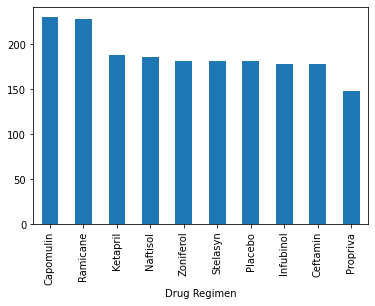

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_data = clean_results.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
bar_data.plot.bar()
plt.show()

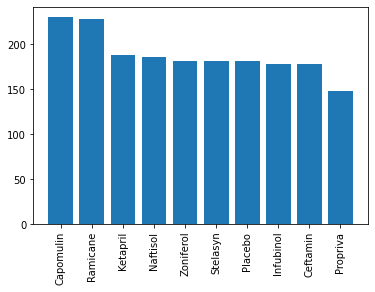

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

y_values = clean_results.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
x_values = y_values.index
plt.bar(x_values, y_values)
plt.xticks(rotation='vertical')
plt.show()

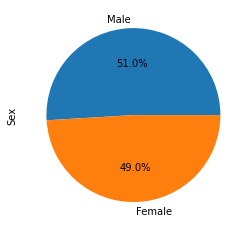

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_results['Sex'].value_counts()
pie_data.plot.pie(autopct='%1.1f%%')
plt.show()

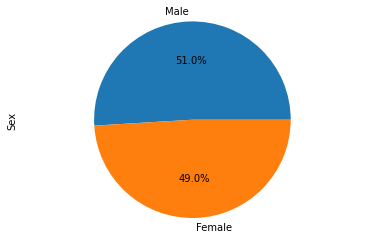

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
counts = clean_results['Sex'].value_counts()
labels = counts.index

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = clean_results.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
reduced_resuts = pd.merge(clean_results, final_timepoints, how='inner', on=['Mouse ID', 'Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = reduced_resuts.loc[reduced_resuts['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(volumes)
    
    # Determine outliers using upper and lower bounds
    lowerq = volumes.quantile(0.25)
    upperq = volumes.quantile(0.75)
    iqr = upperq - lowerq
    outliers = volumes.loc[volumes < (lowerq-(1.5*iqr) or volumes > (upperq+(1.5*iqr)))]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


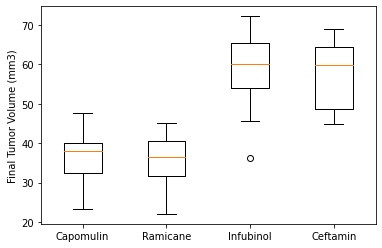

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments_list)
plt.show()

## Line and Scatter Plots

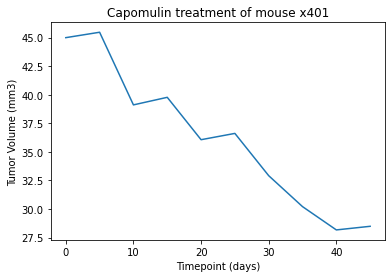

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseid = 'x401'
single_mouse_results = clean_results.loc[clean_results['Mouse ID'] == mouseid]
plt.plot(single_mouse_results['Timepoint'], single_mouse_results['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title(f'Capomulin treatment of mouse {mouseid}')
plt.show()

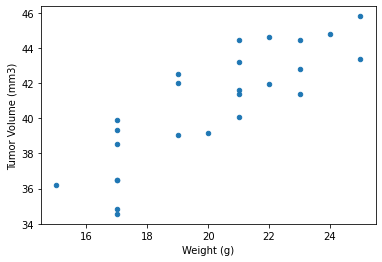

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_results = clean_results.loc[clean_results['Drug Regimen'] == 'Capomulin']
capomulin_means = capomulin_results.groupby('Mouse ID').mean()
capomulin_means.plot.scatter('Weight (g)', 'Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


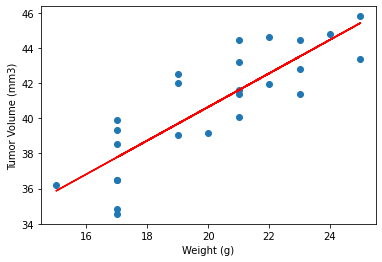

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_means['Weight (g)']
y_values = capomulin_means['Tumor Volume (mm3)']

corr = st.pearsonr(x_values, y_values)[0]
print(f"The correlation between mouse weight and the average tumor volume is {round(corr, 2)}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()